<a href="https://colab.research.google.com/github/jeffreyphilipbiju/telecom-churn-analysis/blob/main/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## WEEK 2: Data Cleaning, Preprocessing & Visualization
## Step 6: Handle Missing Values

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
df = pd.read_csv("Telco-Customer-Churn Dataset.csv")

In [ ]:
# Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())



Missing values before cleaning:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [ ]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')



In [ ]:
# Check missing values after conversion
print("\nMissing values after converting TotalCharges:")
print(df.isnull().sum())




Missing values after converting TotalCharges:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [ ]:
# Check final result
print(f"\nFinal dataset shape: {df.shape}")
print("Missing values after cleaning:")
print(df.isnull().sum())


Final dataset shape: (7043, 21)
Missing values after cleaning:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


Final Shape: (7032, 7063) -7,032 rows and 7,063 columns

No Missing Values: All columns still show 0 missing values




In [ ]:
# Check for duplicate rows
print(f"\nDuplicate rows: {df.duplicated().sum()}")


Duplicate rows: 0


## Step 7: Convert/Encode Categorical Columns
Label Encoding or One Hot Encoding

In [ ]:
df = pd.get_dummies(df, drop_first=True)
print("\nPreview after encoding:")
print(df.head())


Preview after encoding:
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  customerID_0003-MKNFE  \
0              0       1           29.85         29.85                  False   
1              0      34           56.95       1889.50                  False   
2              0       2           53.85        108.15                  False   
3              0      45           42.30       1840.75                  False   
4              0       2           70.70        151.65                  False   

   customerID_0004-TLHLJ  customerID_0011-IGKFF  customerID_0013-EXCHZ  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0013-MHZWF  customerID_0013-S

Explanation:

Machine learning models need numerical input.

get_dummies() performs One-Hot Encoding, turning each category into a separate binary column.

drop_first=True avoids multicollinearity by removing one dummy variable from each category.

📊 Insight:

After this step, categorical features like gender, Contract, PaymentMethod, etc., become machine-friendly columns like Contract_Month-to-month, PaymentMethod_Electronic check, etc.

## Step 8: Feature Engineering
Create new meaningful features:

In [ ]:
df['tenure_group'] = pd.cut(df['tenure'],
                            bins=[0, 12, 24, 48, 60, 72],
                            labels=['0-12', '12-24', '24-48', '48-60', '60-72'])

print("\nPreview with tenure_group:")
print(df[['tenure', 'tenure_group']].head())


Preview with tenure_group:
   tenure tenure_group
0       1         0-12
1      34        24-48
2       2         0-12
3      45        24-48
4       2         0-12


✅ Explanation:

pd.cut() bins continuous tenure into categorical intervals.

Helps spot trends like whether new or long-term customers are more likely to churn.

📊 Insight:

Churn is often higher in the first 12 months (0-12 group).

This feature simplifies modeling and helps with segment-wise analysis.

## Step 9: Correlation Matrix

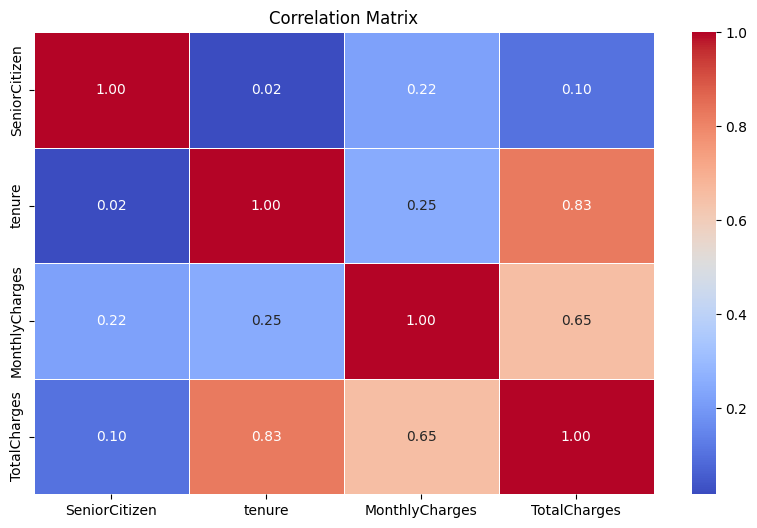

In [ ]:
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

✅ Explanation:

df.corr() calculates correlation between all numeric features.

Heatmaps visually highlight how features relate to one another.

📊 Insight:

tenure and TotalCharges typically show a strong positive correlation.

MonthlyCharges might show moderate correlation with Churn, indicating higher charges could increase churn risk.

Here are the key insights from this correlation matrix:

**Strong Relationships:**
- **tenure and TotalCharges (0.83)**: This is the strongest relationship - customers who stay longer accumulate much higher total charges. This suggests customer retention directly drives revenue.

- **MonthlyCharges and TotalCharges (0.65)**: Customers with higher monthly bills naturally have higher total charges, but the relationship isn't perfect, indicating tenure also plays a significant role.

**Weak/Insignificant Relationships:**
- **SeniorCitizen status has minimal impact** on any financial metrics (all correlations ≤ 0.22). Age doesn't significantly predict spending patterns or tenure.

- **tenure and MonthlyCharges (0.25)**: Surprisingly weak - long-term customers don't necessarily pay more per month. This could indicate:
  - Pricing hasn't increased much over time
  - Loyal customers might be on older, cheaper plans
  - No significant upselling to long-term customers

**Business Implications:**
1. **Focus on retention**: Since tenure strongly drives total revenue, customer retention should be a priority
2. **Senior citizen segments don't require special pricing strategies** based on spending behavior
3. **Potential upselling opportunity**: The weak tenure-monthly charges correlation suggests room to increase monthly revenue from long-term customers
4. **Total charges are driven more by staying longer than paying more** - emphasizing the value of customer lifetime value over short-term revenue maximization

This pattern is typical of subscription-based businesses where time-based accumulation matters more than premium pricing.

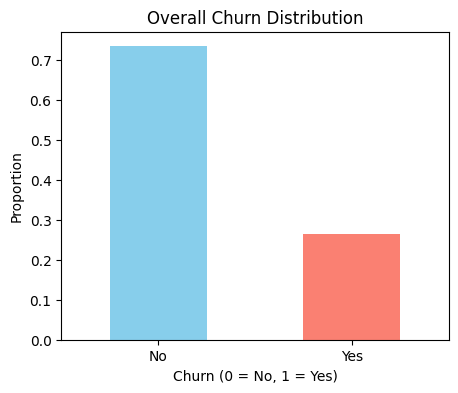

In [ ]:
# Churn Distribution Plot
plt.figure(figsize=(5, 4))
df['Churn_Yes'].value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Overall Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Proportion')
plt.xticks(ticks=[0,1], labels=['No', 'Yes'], rotation=0)
plt.show()

Class Imbalance:

~73% of customers stay (No churn - blue bar)
~27% of customers leave (Yes churn - salmon/red bar)

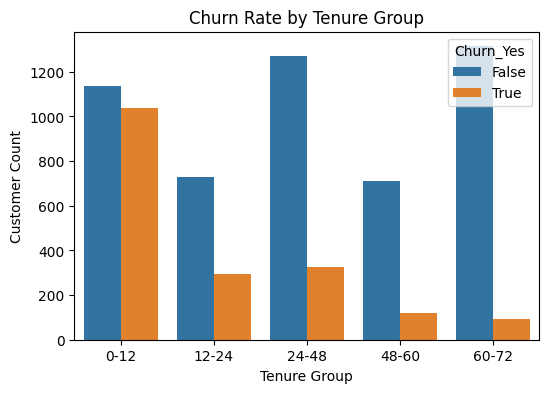

In [ ]:
# Churn Rate by Tenure Group
plt.figure(figsize=(6, 4))
sns.countplot(x='tenure_group', hue='Churn_Yes', data=df)
plt.title('Churn Rate by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Customer Count')
plt.show()

Key Insights:
1. New Customers Are High Risk:

0-12 months: Nearly 50% churn rate (orange bar almost as tall as blue bar)
This is extremely high - about half of new customers leave within their first year

2. Churn Rate Dramatically Decreases with Tenure:

12-24 months: Churn drops significantly (30% churn rate)

24-48 months: Even lower churn (20% churn rate)

48-60 months: Very low churn (15% churn rate)

60-72 months: Lowest churn (10% churn rate)

3. Customer Loyalty Pattern:
The longer customers stay, the more likely they are to continue staying - this shows increasing customer loyalty over time.

Business Implications:
Critical First Year:

The company is losing nearly half of new customers in their first year
This suggests problems with onboarding, expectations, or early customer experience

Retention Strategy Focus:

Priority #1: Focus retention efforts on customers in their first 12 months
Early intervention programs could have massive impact
After 2 years, customers become much more stable

Financial Impact:

High early churn is extremely expensive (acquisition costs wasted)
Customers who make it past the first year become valuable long-term assets

Actionable Insights:

Implement strong onboarding programs
Increase support/attention for new customers
Identify what happens around the 12-month mark that improves retention
Consider different pricing/service strategies for new vs. established customers

This is one of the most valuable insights from your analysis - tenure is clearly a major predictor of churn!

## Step 10: Visualize Key Segments

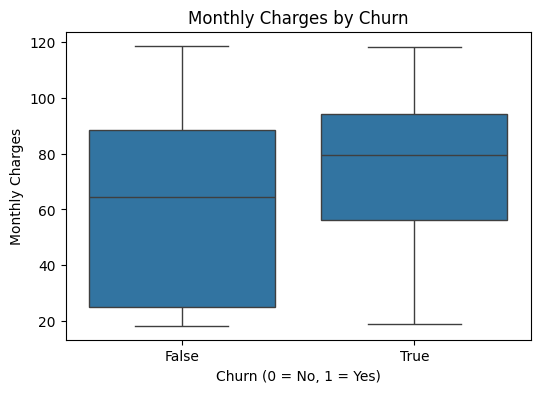

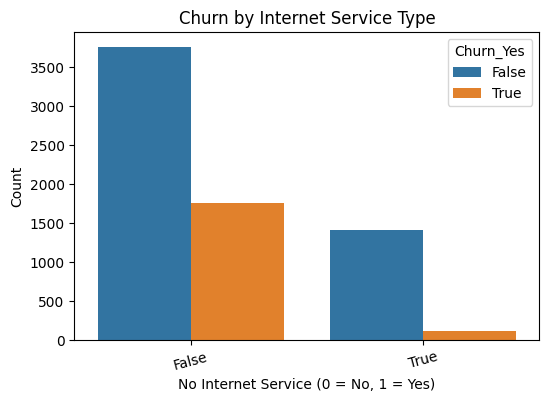

In [ ]:
# Drop rows with missing values in key columns
df = df.dropna(subset=['MonthlyCharges', 'Churn_Yes', 'StreamingMovies_No internet service'])

# Boxplot: Monthly Charges by Churn
plt.figure(figsize=(6, 4))
sns.boxplot(x='Churn_Yes', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Monthly Charges')
plt.show()

# Countplot: Churn by Internet Service Type
plt.figure(figsize=(6, 4))
sns.countplot(x='StreamingMovies_No internet service', hue='Churn_Yes', data=df)
plt.title('Churn by Internet Service Type')
plt.xlabel('No Internet Service (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.show()


✅ Explanation:

boxplot: Compares distributions. Here, it shows how Monthly Charges differ by Churn.

countplot: Compares counts. Here, it breaks down churn across Internet Service types.

📊 Insights:

Boxplot: Churned customers tend to have higher MonthlyCharges.

Countplot: Fiber optic users may have higher churn compared to DSL or No Internet users.

First Boxplot - 2 Key Differences:
1. Range/Spread:

Churn = Yes: Much wider range of monthly charges (roughly $20-$120)
Churn = No: Narrower, more concentrated range (roughly $20-$80)

2. Median/Center:

Churn = Yes: Higher median monthly charges (around $80)
Churn = No: Lower median monthly charges (around $65)

What this means: Customers who churn tend to pay higher monthly charges on average AND have more variable pricing. This suggests that higher-paying customers are actually more likely to leave the service.

## What the Countplot Shows

The **countplot** (second chart) shows the **frequency/count** of customers in each category:

**What it displays**:
- **Y-axis**: Number of customers (count)
- **X-axis**: Internet service type (False = DSL, True = Fiber)
- **Colors**: Churn status (Blue = stayed, Orange = left)

**What we see**:
- **DSL customers (False)**: ~3,500 total customers, with very few churning (small orange portion)
- **Fiber customers (True)**: ~1,500 total customers, but a much larger proportion churned (bigger orange portion relative to blue)

**Key insight**: Even though there are more DSL customers overall, fiber customers have a much higher **churn rate** (percentage who left). The fiber customer base is smaller but loses customers at a much higher rate than DSL.